In [1]:
# Checking the environment
import sys
# I/O
import os
# OpenCV
import cv2
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make figures visible
%matplotlib notebook

print("Python version : {0} ".format(sys.version))
print("OpenCV version : {0} ".format(cv2.__version__))
print("Numpy version  : {0}".format(np.__version__))


Python version : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)] 
OpenCV version : 4.5.1 
Numpy version  : 1.19.2


In [3]:
# Corner Detection using Harris-Shi-Tomasi Feature Detector 

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","maple-leaves.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(copy,(x,y),5,(0, 0, 255),-1)

plt.figure("Harris-Shi-Tomasi Corner Detection", figsize = (6, 4))
plt.subplot(111)
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



<IPython.core.display.Javascript object>

In [4]:
# Harris Corner Detection using OpenCV
# using cv2.cornerHarris()  

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","maple-leaves.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
# copy[dst>0.01*dst.max()]=[0,0,255]
yy,xx = np.where(dst>0.01*dst.max())
print(xx.shape)
for counter in range(xx.shape[0]):
    # x,y,z = i.ravel()
    x = xx[counter]
    y = yy[counter]
    cv2.circle(copy,(x,y),5,(0,0,255),-1)

plt.figure("Harris-Shi-Tomasi Corner Detection - OpenCV", figsize = (6, 4))
plt.subplot(111)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



(1510,)


<IPython.core.display.Javascript object>

In [5]:
# Harris Corner Detection using OpenCV with Sub-Pixel Accuracy
# using cv2.cornerSubPix()  & cv2.connectedComponentsWithStats

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","maple-leaves.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
# the blue points are really small use cv2.circle to make them visible
res = np.hstack((centroids,corners))
res = np.int0(res)
copy[res[:,1],res[:,0]]=[0,0,255]
copy[res[:,3],res[:,2]] = [0,255,0]

for i in corners:
    x,y = i.ravel()
    cv2.circle(copy,(x,y),5,(0,0,255),-1)
    
plt.figure("Harris Corner Detection using OpenCV with Sub-Pixel Accuracy", figsize = (6, 4))
plt.subplot(111)
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<ipython-input-5-adbc57c1319e>:41: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(copy,(x,y),5,(0,0,255),-1)


<IPython.core.display.Javascript object>

In [6]:
# FAST - Features from Accelerated Segment Test
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","maple-leaves.jpg")
img = mpimg.imread(IMG)

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)

img2 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Print all default params
print("Threshold: ", fast.getThreshold())
print("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print("Total Keypoints without nonmaxSuppression: ", len(kp))

img3 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("FAST Features",figsize=(10,4))
plt.subplot(121)
plt.title("FAST Features with Non-Max Supression")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(122)
plt.title("FAST Features without Non-Max Supression")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()

Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  3318
Total Keypoints without nonmaxSuppression:  9219


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


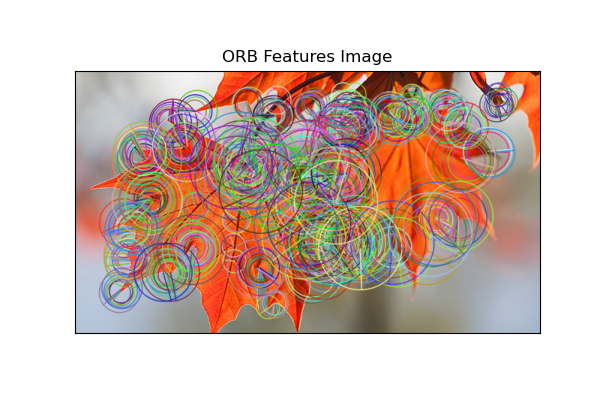

In [13]:
# ORB - Oriented FAST and Rotated BRIEF
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","maple-leaves.jpg")
img = mpimg.imread(IMG)

# Making a copy of the original image
copy = img.copy()

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
cv2.drawKeypoints(img, kp, copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("ORB Features", figsize=(6,4))

plt.subplot(111)
plt.title("ORB Features Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


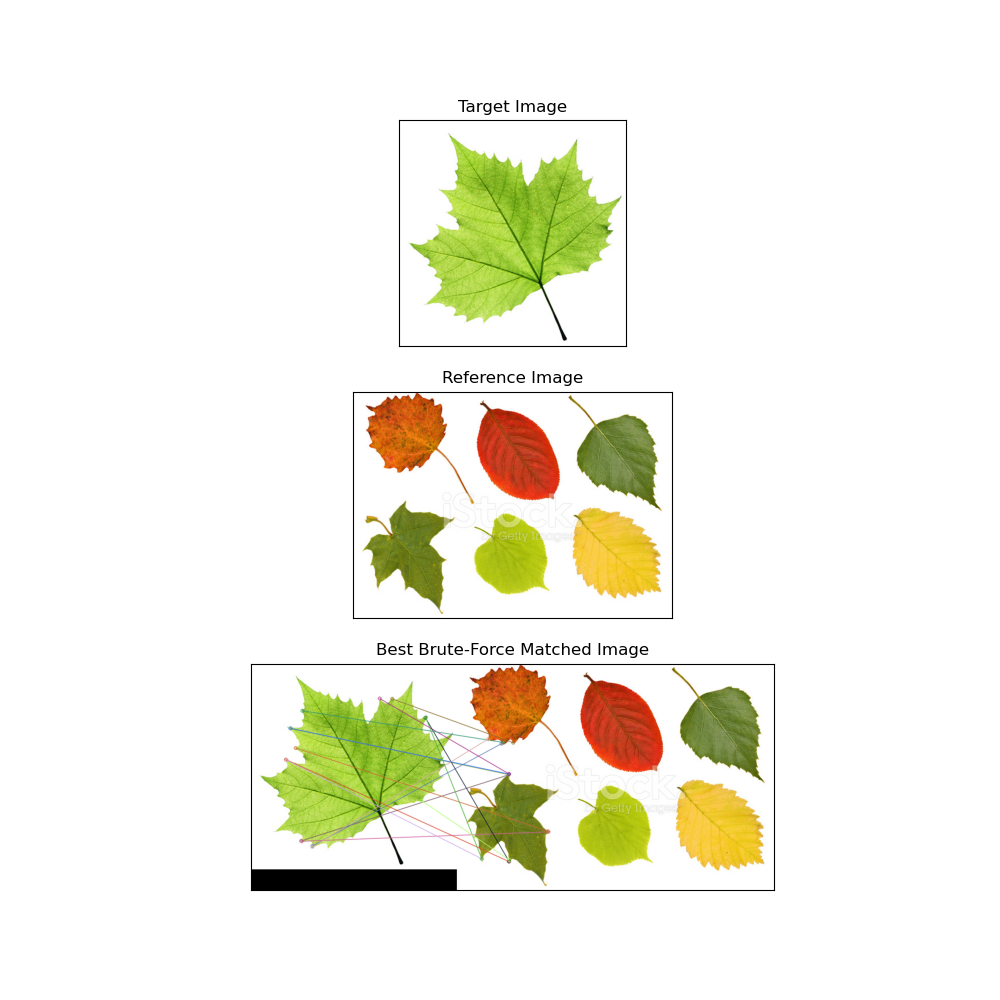

In [17]:
# Brute-Force Matcher - Best Match Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
# IMG   = os.path.join("resources","images","card.png")
# IMG   = os.path.join("resources","images","box.png")
# IMG   = os.path.join("resources","images","template-03.jpg")
IMG1   = os.path.join("resources","images","maple-leaf.jpg")
img1  = mpimg.imread(IMG1)
copy1 = img1.copy()
if (len(copy1.shape) > 2):
    copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
# IMG2  = os.path.join("resources","images","card_in_scene.jpg")
# IMG2  = os.path.join("resources","images","box-in-scene.png")
# IMG2  = os.path.join("resources","images","sceneImagesPanorama.jpg")
IMG2  = os.path.join("resources","images","different-leaves.jpg")
img2  = mpimg.imread(IMG2)
copy2  = img2.copy()
if (len(copy2.shape) > 2):
    copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(copy1,None)
kp2, des2 = orb.detectAndCompute(copy2,None)


# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:15],None,flags=2)

plt.figure("BFMatcher - Best Match",figsize=(10,10))

plt.subplot(311)
plt.title("Target Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Reference Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("Best Brute-Force Matched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()


<IPython.core.display.Javascript object>


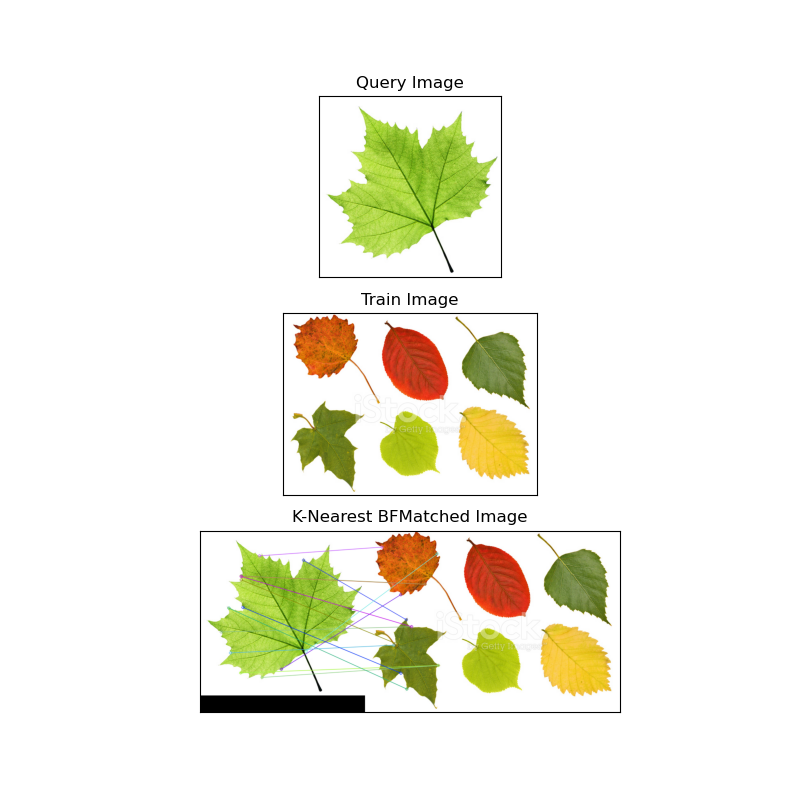

In [24]:
# Brute-Force Matcher - K-Nearest Match Example

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
# IMG1   = os.path.join("resources","images","box.png")
IMG1   = os.path.join("resources","images","maple-leaf.jpg")
img1  = mpimg.imread(IMG1)
copy1 = img1.copy()
if (len(copy1.shape) > 2):
    copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
# IMG2  = os.path.join("resources","images","box-in-scene.png")
IMG2  = os.path.join("resources","images","different-leaves.jpg")
img2  = mpimg.imread(IMG2)
copy2 = img2.copy()
if (len(copy2.shape) > 2):
    copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)

############################################# 
# https://github.com/opencv/opencv-python/issues/126
#############################################    
# SIFT is not available in open CV versions > 3.4.2 and you don’t need opencv-python to use SIFT. You only need the correct version of opencv-contrib-python. So try
# 
# pip uninstall opencv-python
# 
# and
# 
# pip install —user opencv-contrib-python==3.4.2.17
#############################################
####   NOT AVAILABLE IN OPENCV ANYMORE  #####
#############################################
# Initiate SIFT detector
# sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
# kp1, des1 = sift.detectAndCompute(img1,None)
# kp2, des2 = sift.detectAndCompute(img2,None)
#############################################

#############################################
# TO USE THE ORB DETECTOR INSTAED OF SIFT   #
#############################################
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(copy1,None)
kp2, des2 = orb.detectAndCompute(copy2,None)
#############################################

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure("BFMatcher - K-Nearest Match",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("K-Nearest BFMatched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()


<IPython.core.display.Javascript object>


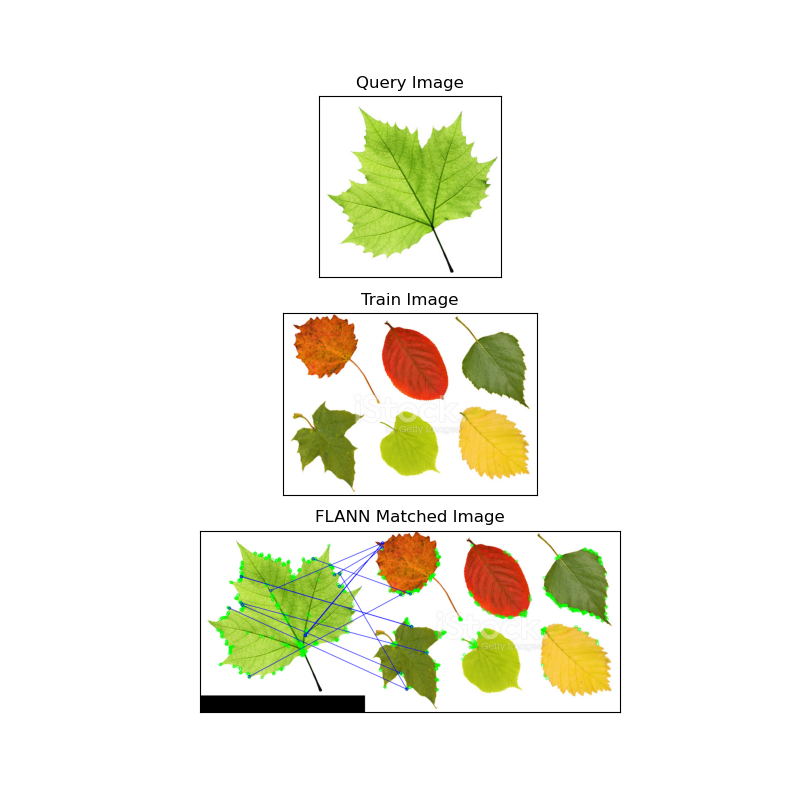

In [28]:
# FLANN Based Matcher

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

# query image
# IMG1   = os.path.join("resources","images","box.png")
IMG1   = os.path.join("resources","images","maple-leaf.jpg")
img1  = mpimg.imread(IMG1)
copy1  = img1.copy()
if (len(copy1.shape) > 2):
    copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
# IMG2  = os.path.join("resources","images","box-in-scene.png")
IMG2  = os.path.join("resources","images","different-leaves.jpg")
img2  = mpimg.imread(IMG2)
copy2  = img2.copy()
if (len(copy2.shape) > 2):
    copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)

#############################################
####   NOT AVAILABLE IN OPENCV ANYMORE  #####
#############################################
# Initiate SIFT detector
# sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
# kp1, des1 = sift.detectAndCompute(img1,None)
# kp2, des2 = sift.detectAndCompute(img2,None)
#############################################

#############################################
# TO USE THE ORB DETECTOR INSTAED OF SIFT   #
#############################################
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(copy1,None)
kp2, des2 = orb.detectAndCompute(copy2,None)
#############################################

# FLANN parameters
# FLANN_INDEX_KDTREE = 0
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#############################################
# ORB yields binary features
# - We need to use a BFMatcher with HAMMING norm instead.
#############################################
# https://answers.opencv.org/question/11209/unsupported-format-or-combination-of-formats-in-buildindex-using-flann-algorithm/
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
# https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html
# http://datahacker.rs/feature-matching-methods-comparison-in-opencv/
# https://docs.opencv.org/master/d4/d5d/group__features2d__draw.html
#############################################
# https://stackoverflow.com/questions/30152498/opencv-hamming-distance-between-flann-matches
#############################################
# While using ORB, you can pass the following. 
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
               table_number = 6, # 12
               key_size = 12,     # 20
               multi_probe_level = 1) #2
#############################################
# index_params= dict(algorithm = FLANN_INDEX_LSH,
#               table_number = 12, # 12
#               key_size = 20,     # 20
#               multi_probe_level = 2) #2
#############################################
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
# des1.convertTo(des1, CV_32F)
# des2.convertTo(des2, CV_32F)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor = (0,0,255),
                   singlePointColor = (0,255,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure("FLANN-Based Match",figsize=(8,8))

plt.subplot(311)
plt.title("Query Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(312)
plt.title("Train Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

plt.subplot(313)
plt.title("FLANN Matched Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()

<IPython.core.display.Javascript object>


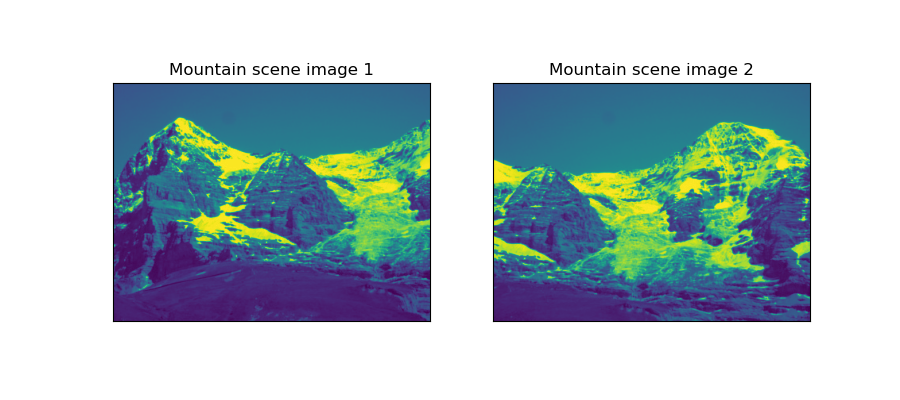

Text(0.5, 1.0, 'Mountain scene image 2')

In [11]:
# Homography - To transfrom between two frames containing the same object

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

MIN_MATCH_COUNT = 10

# query image
# IMG   = os.path.join("resources","images","pikachu.png")
IMG1   = os.path.join("resources","images","mountain-scene-image-001.jpg")
# IMG1   = os.path.join("resources","images","leaf-01.jpg")
img1  = mpimg.imread(IMG1)
copy1 = img1.copy()
if (len(copy1.shape) > 2):
    copy1 = cv2.cvtColor(copy1, cv2.COLOR_BGR2GRAY)

# train image
# IMG2  = os.path.join("resources","images","pikachu_in_scene.jpg")
IMG2  = os.path.join("resources","images","mountain-scene-image-002.jpg")
# IMG2   = os.path.join("resources","images","leaf-02.jpg")
img2  = mpimg.imread(IMG2)
copy2 = img2.copy()
if (len(copy2.shape) > 2):
    copy2 = cv2.cvtColor(copy2, cv2.COLOR_BGR2GRAY)


#############################################
####   NOT AVAILABLE IN OPENCV ANYMORE  #####
#############################################
# Initiate SIFT detector
# sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
# kp1, des1 = sift.detectAndCompute(img1,None)
# kp2, des2 = sift.detectAndCompute(img2,None)
#############################################

#############################################
# TO USE THE ORB DETECTOR INSTAED OF SIFT   #
#############################################
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(copy1,None)
kp2, des2 = orb.detectAndCompute(copy2,None)
#############################################

# draw only keypoints location,not size and orientation
cv2.drawKeypoints(img1, kp1, copy1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, kp2, copy2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure("Computed ORB features from each scene image", figsize=(9,4))

plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(copy1)
plt.title("Mountain scene image 1")

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(copy2)
plt.title("Mountain scene image 2")


<IPython.core.display.Javascript object>


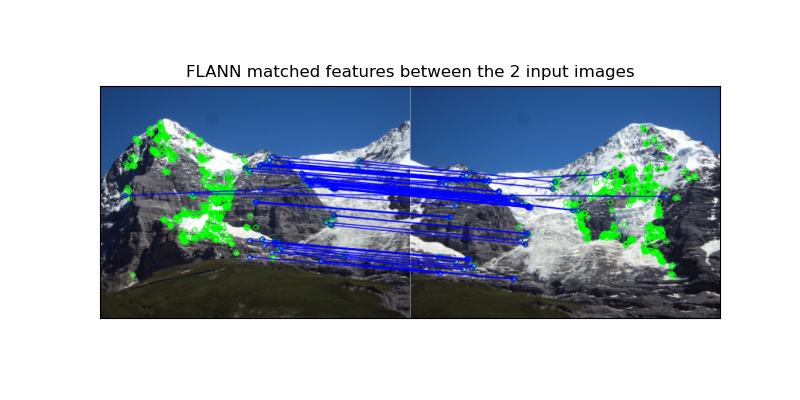

In [15]:
# FLANN parameters
# FLANN_INDEX_KDTREE = 0
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#############################################
# ORB yields binary features
# - We need to use a BFMatcher with HAMMING norm instead.
#############################################
# https://answers.opencv.org/question/11209/unsupported-format-or-combination-of-formats-in-buildindex-using-flann-algorithm/
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
# https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html
# http://datahacker.rs/feature-matching-methods-comparison-in-opencv/
# https://docs.opencv.org/master/d4/d5d/group__features2d__draw.html
#############################################
# https://stackoverflow.com/questions/30152498/opencv-hamming-distance-between-flann-matches
#############################################
# While using ORB, you can pass the following. 
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
               table_number = 6, # 12
               key_size = 12,     # 20
               multi_probe_level = 1) #2
#############################################
# index_params= dict(algorithm = FLANN_INDEX_LSH,
#               table_number = 12, # 12
#               key_size = 20,     # 20
#               multi_probe_level = 2) #2
#############################################
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
# des1.convertTo(des1, CV_32F)
# des2.convertTo(des2, CV_32F)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor = (0,0,255),
                   singlePointColor = (0,255,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure("FLANN-Based Feature Matching",figsize=(8,4))

plt.subplot(111)
plt.title("FLANN matched features between the 2 input images")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)

plt.show()


<IPython.core.display.Javascript object>


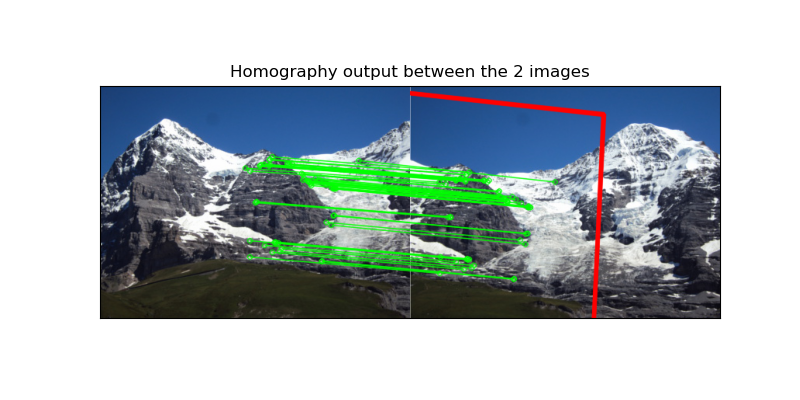

(3, 3)
[[ 1.19183529e+00 -6.65424640e-02 -1.74309096e+02]
 [ 1.40139101e-01  1.11301924e+00 -9.48620737e+00]
 [ 5.17091391e-04 -5.65556860e-05  1.00000000e+00]]


In [18]:

# FLANN_INDEX_KDTREE = 0
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
               table_number = 6, # 12
               key_size = 12,     # 20
               multi_probe_level = 1) #2

search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enough matches are found - {0}/{1}".format(len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.figure("Homography Computation",figsize=(8,4))

plt.subplot(111)
plt.title("Homography output between the 2 images")
plt.xticks([]), plt.yticks([])
plt.imshow(img3)
plt.show()

print(M.shape)
print(M)